In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Week 3 (C6)
### Statistical randomness

"A numeric sequence is said to be **statistically random** when it contains no recognizable patterns or regularities.

Random numbers help you forecast the results, pattern and statistic of real data later. "random" means "non-deterministic", that if you do the same thing again you would get an unpredictably different outcome.

Programming languages include methods to generate **pseudorandom** numbers. These are numbers that are statistically random, but in fact deterministic.

Pseudorandom number generators simulate datasets with no meaningful structure, to avoid us fooling ourselves by seeing structure that isn't meaningful.

Learning Objectives:
1. We can generate statistically random data from known distributions.
2. Different kinds of plots work best for different kinds of data. 

### Seeding a pseudorandom number generator

Each pseudorandom number generator takes as input a "seed" number. If you run the same generator code with the same seed, you'll get the same result again so it's deterministic. If you run with a different seed, you'll get a different result. And whatever seed you use, the output will be statistically random, with no recognizable patterns.

By default, the seed is a number based on the computer's date and time, so that the random number generator gives a different output every time you run it.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# set up a random number generator
rng_default = np.random.default_rng()
# use it to generate a random number
rng_default.random()

0.3840778371424256

In [4]:
rng_default.random()

0.2075556687900535

In [5]:
# set up a random number generator
rng_default2 = np.random.default_rng()
# use it to generate a random number
rng_default2.random()

0.12609776222555624

In [6]:
# set up a random number generator with specific seed in argument = number wont change
rng_seed42 = np.random.default_rng(seed=42)
# use it to generate a random number
# one number (fixed)
print(rng_seed42.random())
# 10 numbers (fixed)
rng_seed42.random(10)

0.7739560485559633


array([0.43887844, 0.85859792, 0.69736803, 0.09417735, 0.97562235,
       0.7611397 , 0.78606431, 0.12811363, 0.45038594, 0.37079802])

Here, we set up the random number generator again with the same seed, which resets it (reset through (seed=42)).

Note that the **first** value output here is the same as before when you ran `rng_seed42.random()`.

However, running the same line of code **without resetting the seed** will generate different random numbers:

In [7]:

rng_seed42.random(10)

array([0.92676499, 0.64386512, 0.82276161, 0.4434142 , 0.22723872,
       0.55458479, 0.06381726, 0.82763117, 0.6316644 , 0.75808774])

The numpy `.random()` function generates random numbers that are uniformly distributed between `0` and `1`.

To generate uniformly distributed random numbers with different uniform ranges, multiply the standard output by the width of the range, and add the start of the range.

In [96]:
rng_seed42.random(10) * 1000

array([408.52864372, 853.40307327, 233.93948587,  58.30274169,
       281.38389202, 293.59375777, 661.91651473, 557.03215234,
       783.89820911, 664.31354033])

In [9]:
(rng_seed42.random(10) * 5) + 20

array([24.83754866, 21.62912679, 21.85229853, 22.34777906, 20.9473568 ,
       20.64960753, 22.37852463, 21.13454675, 23.34906997, 22.18575959])

Sometimes when people say "random" informally, they mean "equally likely to be anywhere". A random uniform number kind of does that, in addition to being statistically random. In a moment, we will start plotting random uniform numbers and see what the distributions actually look like.

## 1-Dimensional Plots

Plots are tools to understand and communicate data. 

To see what different plots show about totally random data, we will first generate some data frames of random numbers. Each data frame will have 2, or 10, or 1000 entries.

In [10]:
# set up a random number generator with known seed
rng_seed2025 = np.random.default_rng(seed=2025)

# create some data frames with 2 random numbers
a2 = rng_seed2025.random(2)
b2 = rng_seed2025.random(2) + 0.1

df_random2 = pd.DataFrame(
    {"a": a2, 
     "b": b2})

# same with 10 random numbers
a10 = rng_seed2025.random(10)
b10 = rng_seed2025.random(10) + 0.1

df_random10 = pd.DataFrame(
    {"a": a10, 
     "b": b10})

# same with 1000 random numbers, but abbreviating the code
df_random1000 = pd.DataFrame(
    {"a": rng_seed2025.random(1000), 
     "b": rng_seed2025.random(1000) + 0.1})

In [11]:
df_random1000

,a,b
0,0.109833,0.830485
1,0.496302,0.785628
2,0.290132,0.750214
3,0.485851,0.851575
4,0.948519,0.649763
...,...,...
995,0.771707,1.047835
996,0.206534,0.166342
997,0.478687,0.158698
998,0.004112,0.133154


In [12]:
df_random1000.describe()

,a,b
count,1000.000000,1000.000000
mean,0.500506,0.612202
std,0.287619,0.284093
min,0.000706,0.100841
25%,0.247420,0.383750
50%,0.495802,0.613779
75%,0.749865,0.863218
max,0.998232,1.097221


### Plot the data, at long last - histograms first

First, we will plot the `a` values only, using histograms.

As you make each plot, ask "what is this telling me about the data"?

<Axes: xlabel='a', ylabel='Count'>

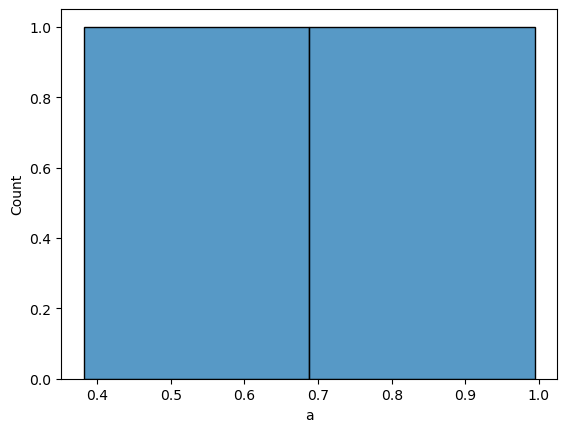

In [13]:
sns.histplot(x="a", data=df_random2)

<Axes: xlabel='a', ylabel='Count'>

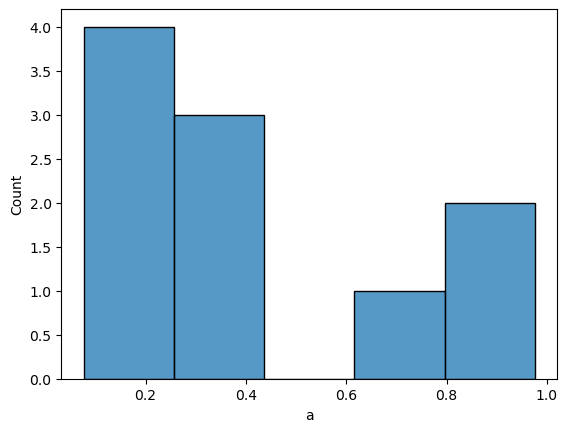

In [14]:
sns.histplot(x="a", data=df_random10)

<Axes: xlabel='a', ylabel='Count'>

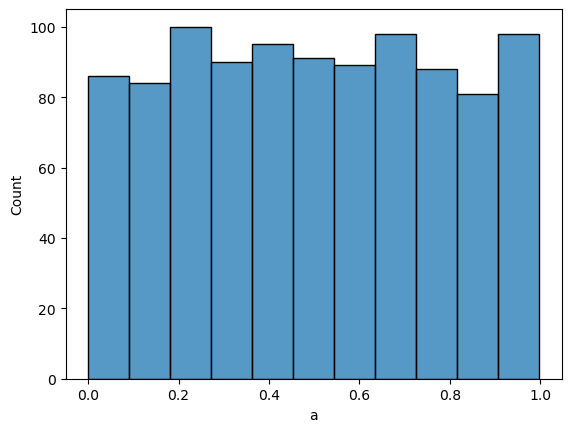

In [15]:
sns.histplot(x="a", data=df_random1000)

These plots show that `sns.histplot` estimates the bins automatically from the data. Reminder, a bin in a histogram is a range of values in which we count data, and one bar in a histogram has x-axis edges corresponding to the values in the bin, and a y-value height corresponding to the count of values that fall in that bin. The width of a bin means the distance between the values on the x-axis.

The automated bin estimation in `sns.histplot` can sometimes be useful, sometimes not.

We can specify bins ourselves using the `bins` argument, or combining the `binwidth` and `binrange` argument - see the help file for `sns.histplot`.

Let's plot again setting `binwidth = 0.1` and `binrange = [0, 1]`, which is a sensible number when we know that the data are between 0 and 1.

<Axes: xlabel='a', ylabel='Count'>

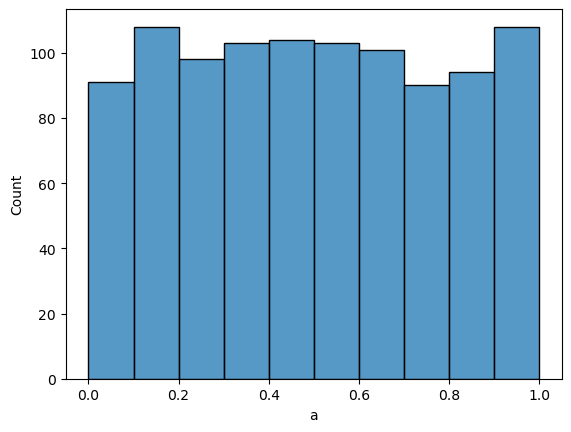

In [100]:
sns.histplot(x="a", data=df_random1000, binwidth=0.1, binrange=[0, 1])

In this case comparing the histogram with the values of `df_random2` shows how the histogram plot works - a count of 1 for each point in this very small dataset.

In [17]:
print(df_random2)

          a         b
0  0.994458  0.927148
1  0.382010  0.937255


<Axes: xlabel='a', ylabel='Count'>

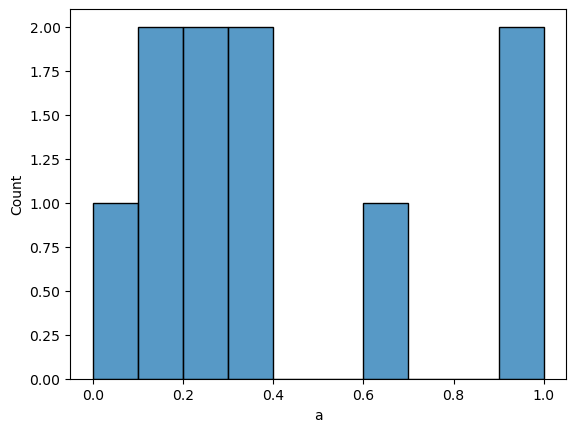

In [18]:
sns.histplot(x="a", data=df_random10, binwidth=0.1, binrange=[0, 1])

Again, you can compare the histogram with the values of `df_random10` and see a count of 1 for each point in this very small dataset (in this case, 10 numbers in data=df_random10).
For your very small dataset, it’s very common that all y-values (bin) are 1. The frequency of numbers per bin might all be 1, or some 2, depending on your binning.

In [19]:
print(df_random10)

          a         b
0  0.975809  1.074092
1  0.077225  0.523896
2  0.317456  0.163144
3  0.919555  0.591586
4  0.675870  0.388343
5  0.285825  0.311616
6  0.389543  0.307432
7  0.230220  0.679021
8  0.166961  0.690850
9  0.153436  0.988064


This histogram shows that these ten points are not *evenly spaced* between 0 and 1 - they are *randomly distributed*. Small samples from random distributions look uneven.

Now let's plot 1000 random points on a histogram.

<Axes: xlabel='a', ylabel='Count'>

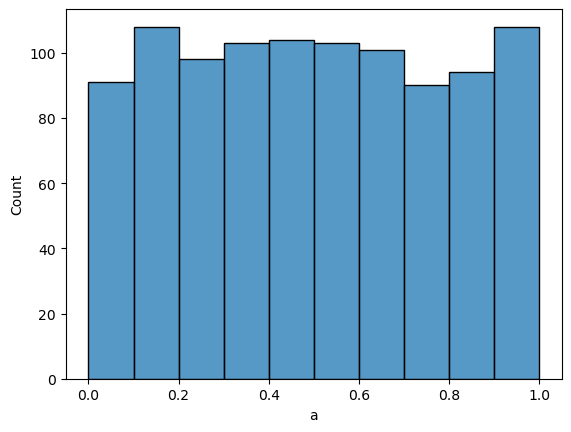

In [20]:
sns.histplot(x="a", data=df_random1000, binwidth=0.1, binrange=[0, 1])

Histograms can be uninformative for very small datasets.
It's easier to compare histograms of different datasets when they have the same bins (same intervals in x-axis).

### Kernel Density Estimate Plot

Try again using a kernel density estimate plot - this is like a smoothed histogram - on the data with different sizes.

<Axes: xlabel='a', ylabel='Density'>

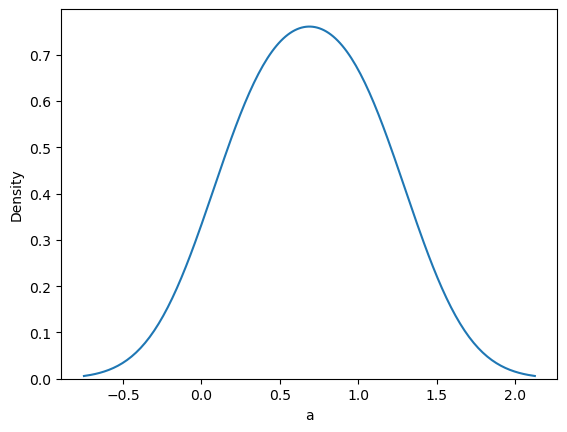

In [21]:
sns.kdeplot(x="a", data=df_random2)

<Axes: xlabel='a', ylabel='Density'>

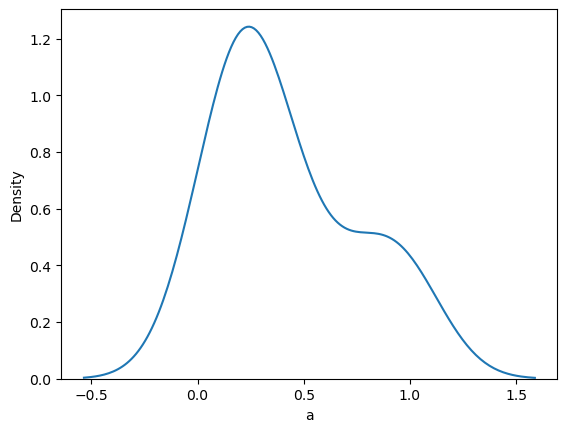

In [22]:
# Type your own code here
sns.kdeplot(x="a", data=df_random10)

<Axes: xlabel='a', ylabel='Density'>

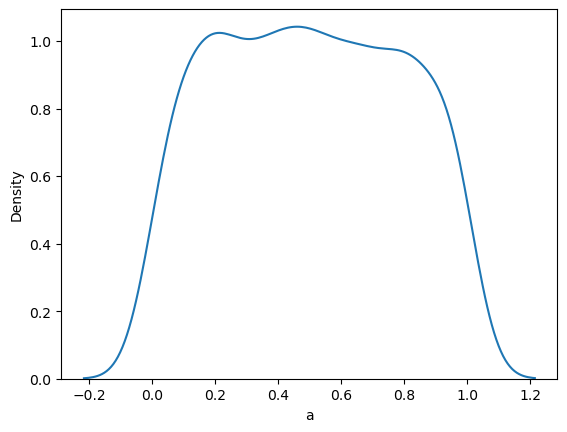

In [23]:
# Type your own code here
sns.kdeplot(x="a", data=df_random1000)

### Cumulative Density Plot

shows the proportion of data values less than a given number. Specifically, the y-value of the curve at a given x-value is the proportion of data values less than x.

,a,b
0,0.994458,0.927148
1,0.382010,0.937255


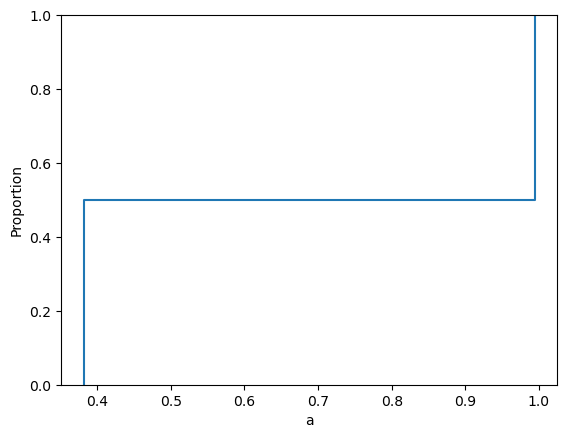

In [24]:
sns.ecdfplot(x="a", data=df_random2)
df_random2

,a,b
0,0.975809,1.074092
1,0.077225,0.523896
2,0.317456,0.163144
3,0.919555,0.591586
4,0.675870,0.388343
5,0.285825,0.311616
6,0.389543,0.307432
7,0.230220,0.679021
8,0.166961,0.690850
9,0.153436,0.988064


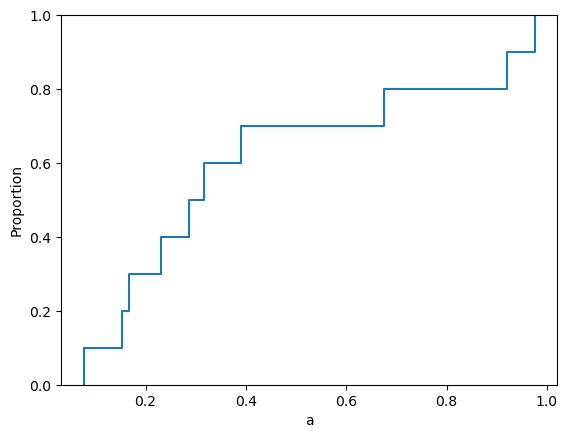

In [25]:
# Type your own code here
sns.ecdfplot(x="a", data=df_random10)
df_random10

<Axes: xlabel='a', ylabel='Proportion'>

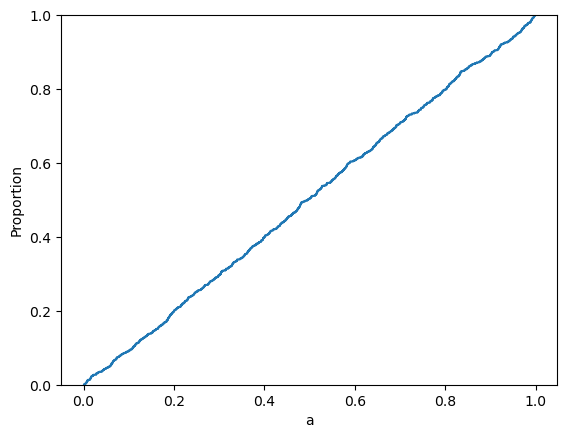

In [26]:
# Type your own code here
sns.ecdfplot(x="a", data=df_random1000)

With 1000 points, this distribution looks nice and uniform. With 2 or 10, not so much. But it's hard to compare these plots when they have different axes - in fact the 2-datapoints don't even nearly fill out the whole x-axis range.

Using the "customising plots" tools from homework 5, we can specify the axis range on these ecdf plots so that we can compare them.

We learned `plt.ylim` to set y-axis limits, and similarly `plt.xlim` sets x-axis limits.

Try plotting the ecdf plots from 2, 10, and 1000 points on the same axis limits, so that we can see the representation.

(0.0, 1.0)

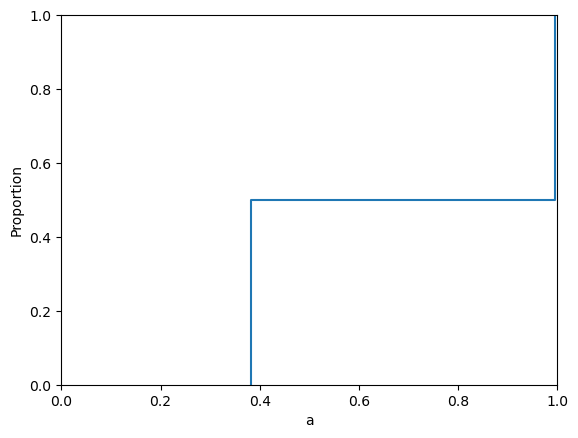

In [27]:
sns.ecdfplot(x="a", data=df_random2)
plt.xlim(0.0, 1.0)

(0.0, 1.0)

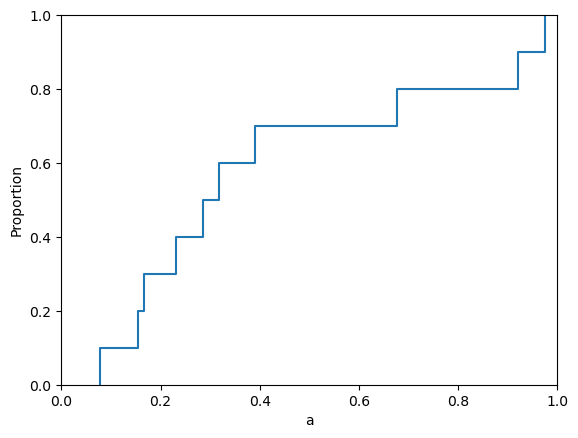

In [28]:
sns.ecdfplot(x="a", data=df_random10)
plt.xlim(0.0, 1.0)

(0.0, 1.0)

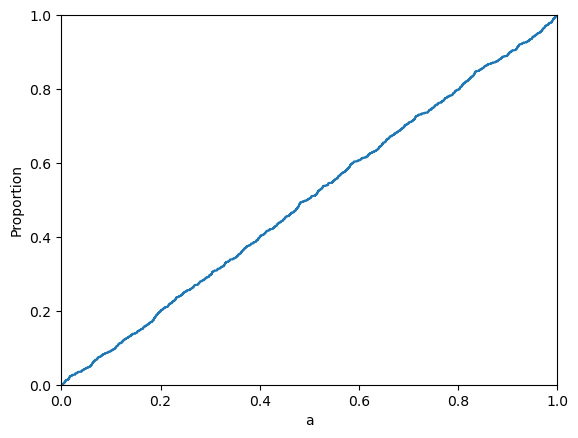

In [29]:
sns.ecdfplot(x="a", data=df_random1000)
plt.xlim(0.0, 1.0)

These empirical cumulative density plots can be used effectively both on larger and smaller datasets. They give a sense of the "unevenness" of the data.
A perfectly even dataset (values spread uniformly) produces a smooth, almost straight diagonal line in a CDF.

-Each x-value adds roughly the same proportion to the cumulative total.

-An uneven dataset (values clustered or sparse in certain ranges) produces a stepped or jagged curve.

-Large jumps in the CDF → many values are concentrated at that x-range.

-Flat sections → few or no values in that range.

### Plots the y-values from the random dataset

In the random datasets above (`df_random2`, `df_random10`, `df_random1000`), we also generated a random `b` column as well as an `a` column.

<Axes: xlabel='Count', ylabel='b'>

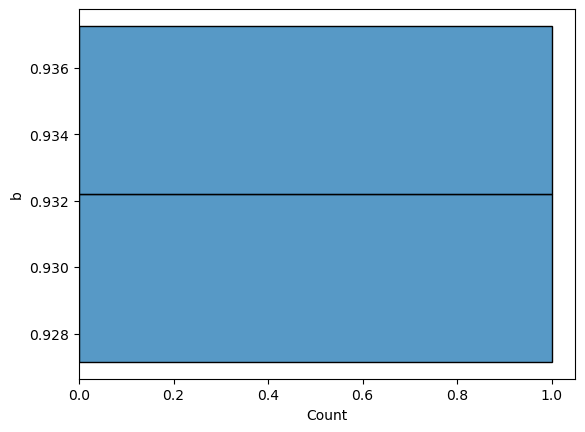

In [30]:
sns.histplot(y="b", data=df_random2)

<Axes: xlabel='Count', ylabel='b'>

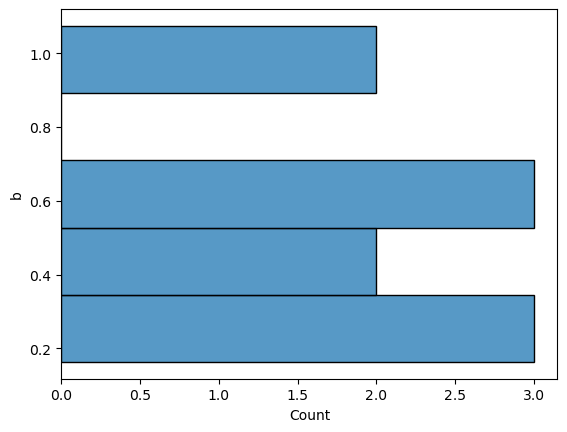

In [31]:
sns.histplot(y="b", data=df_random10)

<Axes: xlabel='Count', ylabel='b'>

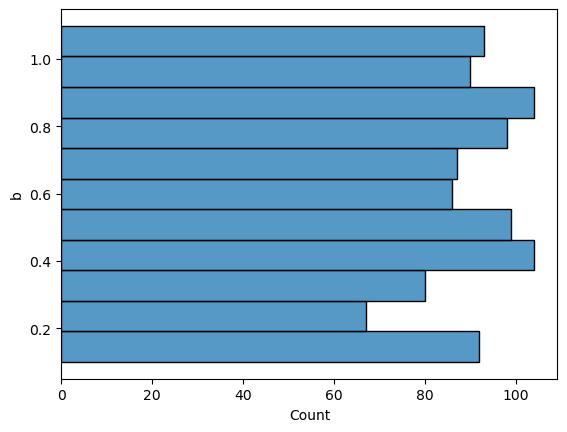

In [32]:
sns.histplot(y="b", data=df_random1000)

(0.0, 1.0)

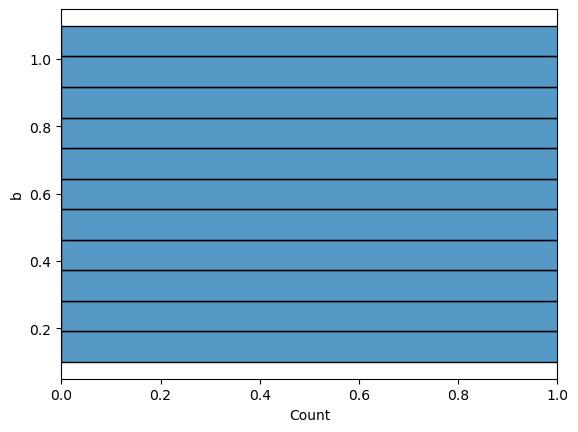

In [33]:
sns.histplot(y="b", data=df_random1000)
plt.xlim(0.0, 1.0)
# notice that we lose data when setting plt.xlim. its suppose to be plt.ylim

## 2-dimensional plots

The plot types above just examine a single data axis.

We can now use scatterplots to look at correlations of two variables.

Start by a scatterplot with the two-point random data with `a` on the x-axis and `b` on the y-axis.


<Axes: xlabel='a', ylabel='b'>

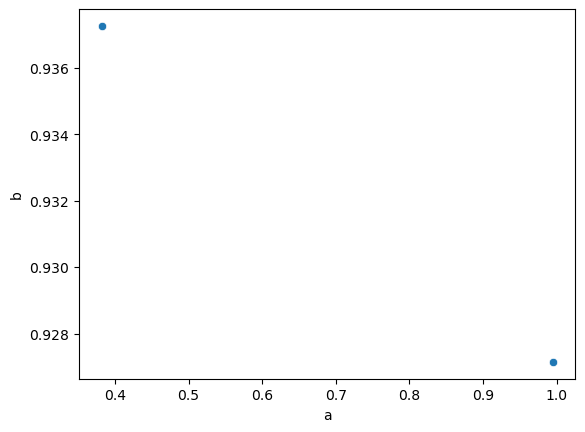

In [34]:
sns.scatterplot(x='a',y='b',data=df_random2)

<Axes: xlabel='a', ylabel='b'>

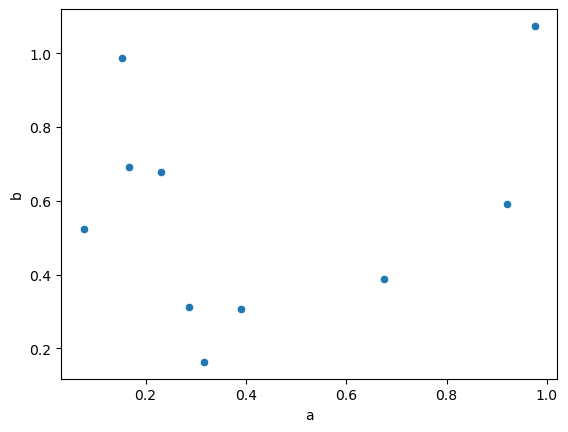

In [35]:
sns.scatterplot(x='a',y='b',data=df_random10)

<Axes: xlabel='a', ylabel='b'>

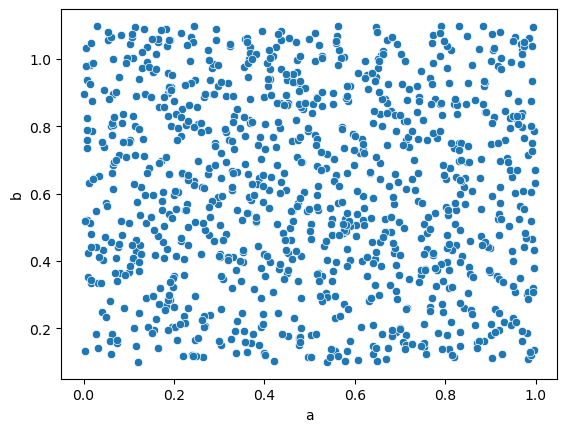

In [36]:
sns.scatterplot(x='a',y='b',data=df_random1000)

Try that again for the 10-point dataset, and then for the 1000-point dataset. 

## 2-dimensional distribution plots

Seaborn's `displot` function allows this. Its default values plot a 2-dimensional histogram where colour is used to represent counts. More intense color means higher count. This  is different from a standard 1-d histogram, that uses height to represent counts.

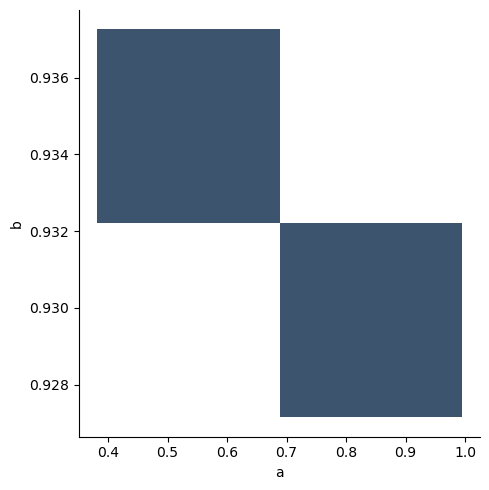

In [37]:
sns.displot(data = df_random2, x = "a", y = "b")

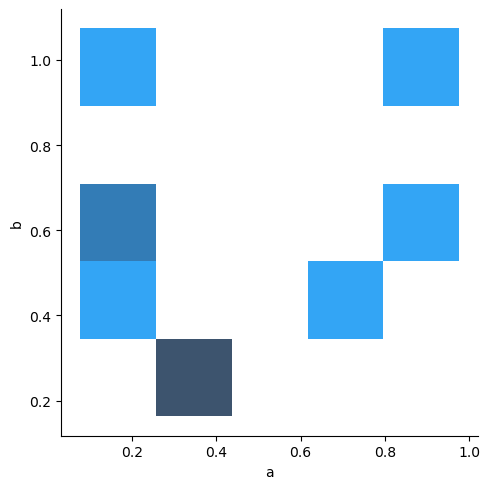

In [38]:
# and for 10 data points
sns.displot(data = df_random10, x = "a", y = "b")

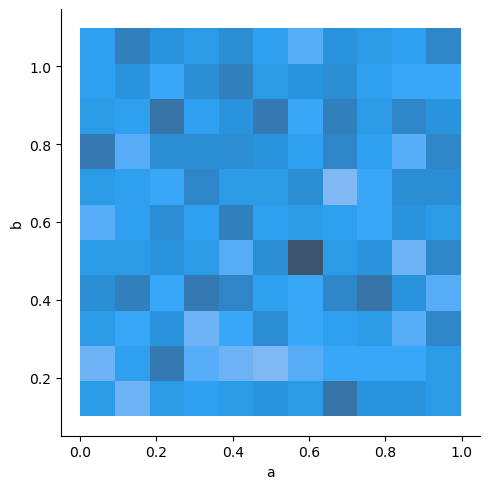

In [39]:
# and for 1000 data points
sns.displot(data = df_random1000, x = "a", y = "b")

## Combining plot types

Seaborn's `jointplot` summarises both 1-d and 2-d plots in the same axes.

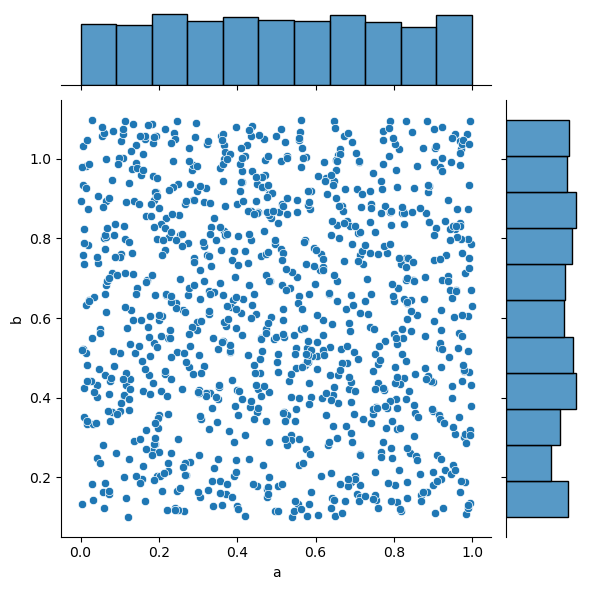

In [40]:
sns.jointplot(data = df_random1000, x = "a", y = "b")

Try to read the `jointplot` and `displot` documentation, and use the examples there to experiment with different plot approaches.

For example, you could try adding `kind = "kde"`.

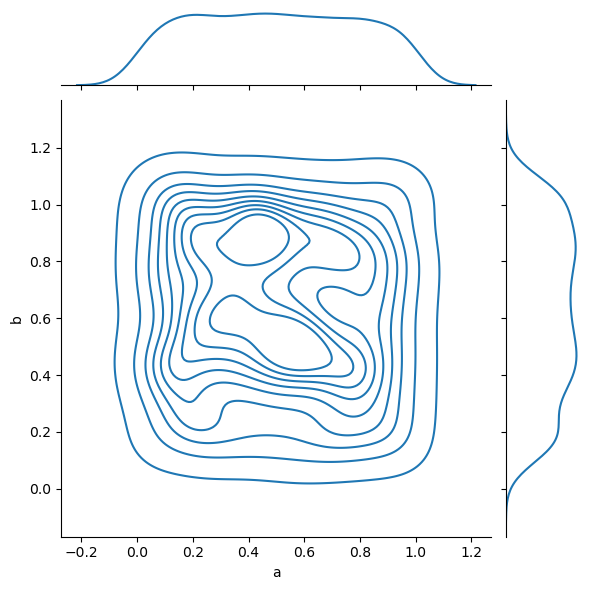

In [41]:
sns.jointplot(data = df_random1000, x = "a", y = "b", kind='kde')

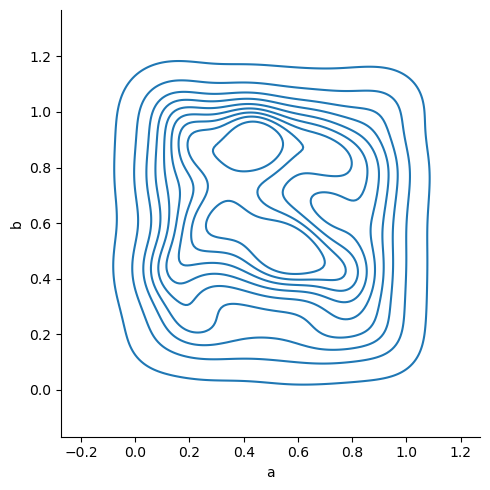

In [42]:
sns.displot(data = df_random1000, x = "a", y = "b", kind='kde')

## Plots with linear fits

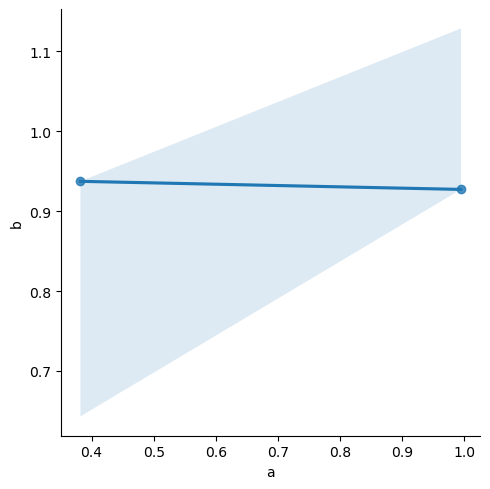

In [43]:
sns.lmplot(data = df_random2, x = "a", y = "b")

You may think this is absurd. This is the point: fitting statistical models to tiny datasets is absurd. Linear model fitting of such tiny datasets is very uncertain, and the plots might not be informative. Today's exercise is meant to give you some "feel" for what random datasets look like and when a plot isn't effective with the data.

Try to remember this in your data analyses going forwards.

Let's try the linear regression plot on the random dataset with 10 points. 

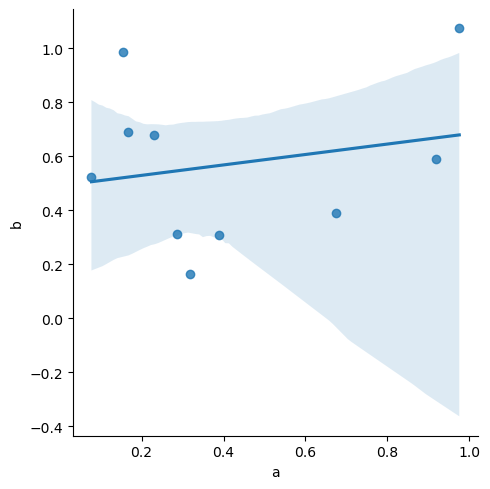

In [44]:
sns.lmplot(data = df_random10, x = "a", y = "b")

Then again with 1000 points.

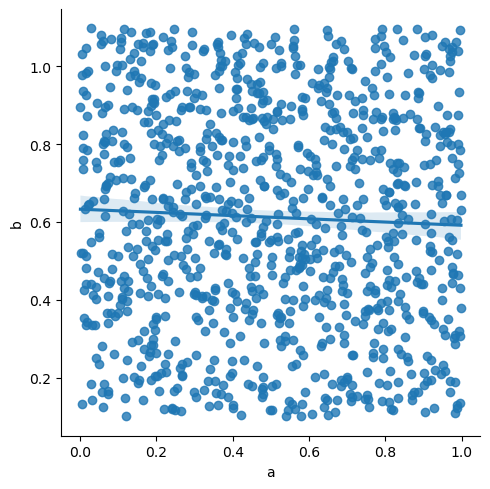

In [45]:
sns.lmplot(data = df_random1000, x = "a", y = "b")


The code below uses the `scatter_kws` and `line_kws` arguments to change colours of the points and line. 


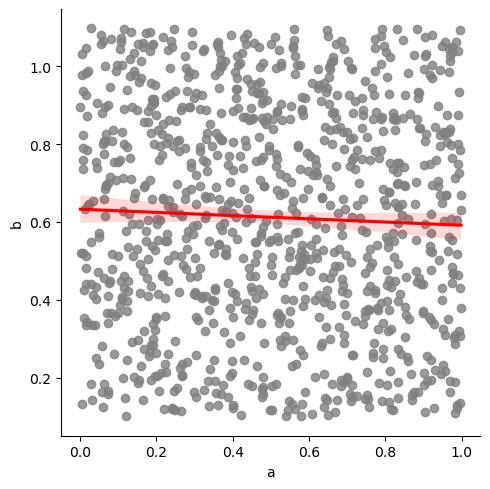

In [46]:
sns.lmplot(## add the arguments you need here
            scatter_kws= {"color" : "gray"}, 
            line_kws= {"color" : "red"}, data=df_random1000, x='a',y='b')

Overall, this line makes it visually clear that there's no meaningful correlation and some plots can mislead.